## ***PART C:-***    **Unsupervised Learning:**


**Clustering as an Unsupervised Learning Task:**


*   Task Chosen: Clustering, specifically the K-Means algorithm.

*   Why Clustering?: It's a foundational method in machine learning for finding patterns and groupings in data without pre-labeled classes or examples. its wide range of applications and the interesting challenges it presents, such as determining the number of clusters, dealing with different shapes and sizes of clusters, and the sensitivity to the scale of the data.

*   Applications: Market segmentation, social network analysis, organization of large computer clusters, bioinformatics, image segmentation, anomaly detection and more.

**What do you need to know to perform clustering:**
*   Understanding the data.
* Preprocessing.
* Choosing the right algorithm..
* Determining number of Clusters.
* Algorithm Parameters
* Rhobustness and stability
* Visualization.

**Evaluation Metrics involved in clustering:**

* Silhouette Coefficient: Measures and compares the similarity of an object to its own cluster and other clusters. A high silhouette value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

* Davies-Bouldin Index: The average 'similarity' between clusters, where similarity is a measure that compares the distance between clusters with the size of the clusters themselves. A lower Davies-Bouldin index indicates better clustering.

* Calinski-Harabasz Index: It is the ratio of the sum of between-clusters dispersion and of within-cluster dispersion for all clusters. The higher the score, the better the model is defined.

* Dunn Index: The ratio between the smallest distance between observations not in the same cluster to the largest intra-cluster distance. Higher values indicate better clustering.

* Adjusted Rand Index (ARI): Measures the similarity between two assignments, ignoring permutations and with chance normalization. A score close to 0.0 indicates random assignments, and a score close to 1 indicates perfect agreement between assignments.




* We load the dataset using load_wine() from sklearn.datasets.


In [1]:
# The Wine Recognition Dataset is a classic dataset in machine learning for classification tasks.
# Here, we will load the dataset, perform a simple preprocessing (scaling), and then visualize it using PCA for dimensionality reduction.
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target



* The dataset is then scaled using StandardScaler to ensure that each feature contributes equally to the analysis.

In [2]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



* The Wine Recognition dataset has been successfully visualized using PCA(Principal Component Analysis) for dimensionality reduction. In the scatter plot, you can see the data points reduced to two principal components, with different colors representing different types of wine.
* The PCA process simplifies the data, making patterns more evident for clustering algorithms to detect.

In [3]:
# Apply PCA to reduce the dataset to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)



* This visualization can help in understanding the separation and overlap between different types of wines based on their chemical characteristics.
* This transformation facilitates visualization in a 2D plot.
* A scatter plot is created to visualize the wines in the reduced space, with each point representing a wine and its color representing its class.
-  The PCA plot suggests that there may be some natural clustering corresponding to the different types of wine.

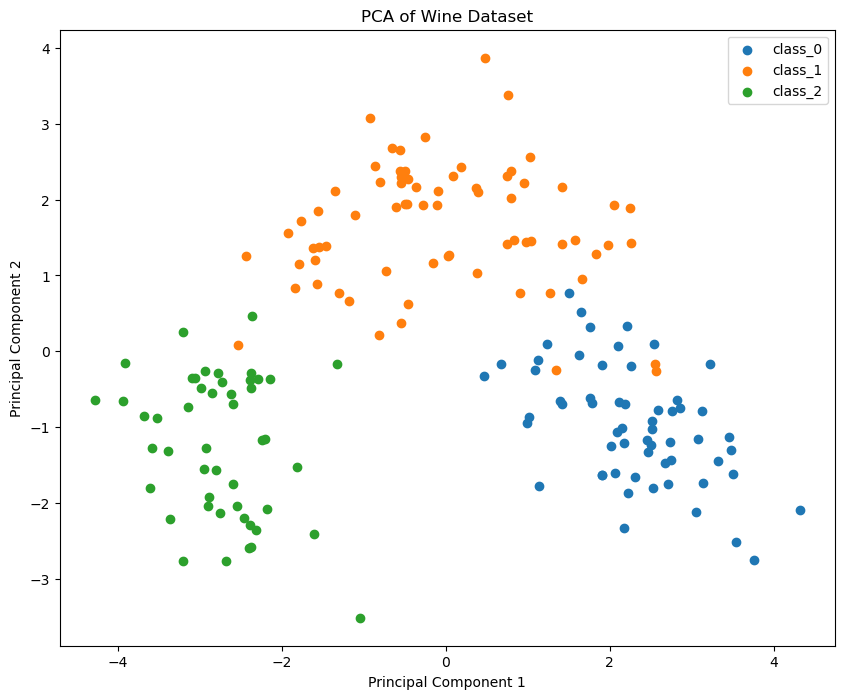

In [4]:
# Visualize the results
plt.figure(figsize=(10, 8))
for i in range(len(wine.target_names)):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=wine.target_names[i])
plt.legend()
plt.title('PCA of Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


**Discussion on the Dataset and Operations Performed:**

* The dataset was scaled using StandardScaler to normalize the features, ensuring each feature contributes equally to the analysis.
* PCA was used to reduce the dataset to two principal components for visualization, which helps us understand the inherent clustering of the data.

**Motivation for Choice:**
* The Wine dataset proves to be an optimal selection for the current undertaking. It boasts a moderate size and complexity, encompassing an array of numerical characteristics that represent diverse physicochemical properties of wine.
* It can be widely utilized for classification and clustering tasks, this dataset yields easily interpretable results and can be effectively visualized after dimensionality reduction.


In [5]:
# Re-importing the pandas library and re-defining the principal components analysis for the wine dataset.
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Re-load the dataset
wine = load_wine()
X = wine.data
wine_feature_names = wine.feature_names

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Adjust the number of components as needed
pca.fit(X_scaled)
components = pca.components_

# Create a DataFrame for the principal components
components_df = pd.DataFrame(
    components, columns=wine_feature_names, index=["PC1", "PC2"]
)

# Display the DataFrame
print(components_df)

      alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
PC1  0.144329   -0.245188 -0.002051          -0.239320   0.141992   
PC2 -0.483652   -0.224931 -0.316069           0.010591  -0.299634   

     total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
PC1       0.394661    0.422934             -0.298533         0.313429   
PC2      -0.065040    0.003360             -0.028779        -0.039302   

     color_intensity       hue  od280/od315_of_diluted_wines   proline  
PC1        -0.088617  0.296715                      0.376167  0.286752  
PC2        -0.529996  0.279235                      0.164496 -0.364903  



- PC1 correlates positively with total_phenols, flavanoids, od280/od315_of_diluted_wines, and proline, which are all related to the phenolic compounds and the antioxidant capacities of the wines. It suggests that PC1 may be capturing variance associated with the biochemical properties of wine that are typically linked to quality.

- PC2 is negatively correlated with alcohol and color_intensity, which may indicate that this component captures variance associated with the physical properties of wine(such as its alcohol content and depth of color).

**K-Means Clustering:**

* Motivation : K-Means is a popular and straightforward clustering algorithm that partitions the dataset into K distinct, non-overlapping subgroups or clusters. It's a good starting point due to its simplicity and efficiency.
* Procedure : It partitions 'n' observations into 'k' clusters in which each observation belongs to the cluster with the nearest mean. This results in a partitioning of the data space into Voronoi cells.
* Optimization : The algorithm iteratively assigns points to the nearest cluster center and then computes the center of each cluster repeatedly.The 'k-means++' initialization method is used to speed up convergence and the algorithm repeats the process until the assignment of instances to clusters no longer changes.
* Implementation : The KMeans class is used to cluster data, and has some important parameters that can be set. The number of clusters is determined by the n_clusters parameter, and the init parameter sets the method used to initialize the algorithm. The default method, 'k-means++', is often a good choice. Two other key parameters are n_init and max_iter. The n_init parameter determines how many times the algorithm will be run with different centroid seeds, which can improve clustering quality. The max_iter parameter sets the maximum number of iterations the algorithm can run for a single run.
* Considerations : The number of clusters K needs to be set beforehand, which can be determined using methods like the Elbow method or the Silhouette score. K-Means is sensitive to the scale of the data, hence preprocessing steps like normalization are important.

**Gaussian Mixture Models (GMM):**

* Motivation : GMM is a probabilistic model that assumes all the data points are generated from a mixture of several Gaussian distributions with unknown parameters. This is particularly useful for the Wine dataset if we believe that the boundaries between different types of wine are not clearly defined and can overlap.
* Procedure : GMM accommodates mixed membership. It has a key advantage in which it can incorporate the covariance between data points into its model. This allows for the identification of more complex clusters.

* Optimization : To estimate the mean and variance of each Gaussian cluster and maximize the likelihood of the data points, the GMM (Gaussian Mixture Model) uses the expectation-maximization (EM) algorithm. First, the algorithm calculates the probabilities that each data point belongs to each cluster during the expectation step. Then, during the maximization step, the model parameters are updated based on these probabilities.

* Implementation :  In scikit-learn the GaussianMixture class have key parameters including n_components for the number of mixture components, covariance_type for the type of covariance to use (full, tied, diag, spherical), n_init for the number of initializations to perform, and max_iter for the maximum number of iterations.

* Considerations: GMM can fit more complex cluster shapes since each mixture component can freely define its covariance structure. However, it is computationally more intensive than K-Means and also requires the number of mixture components (clusters) to be specified a priori.

/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


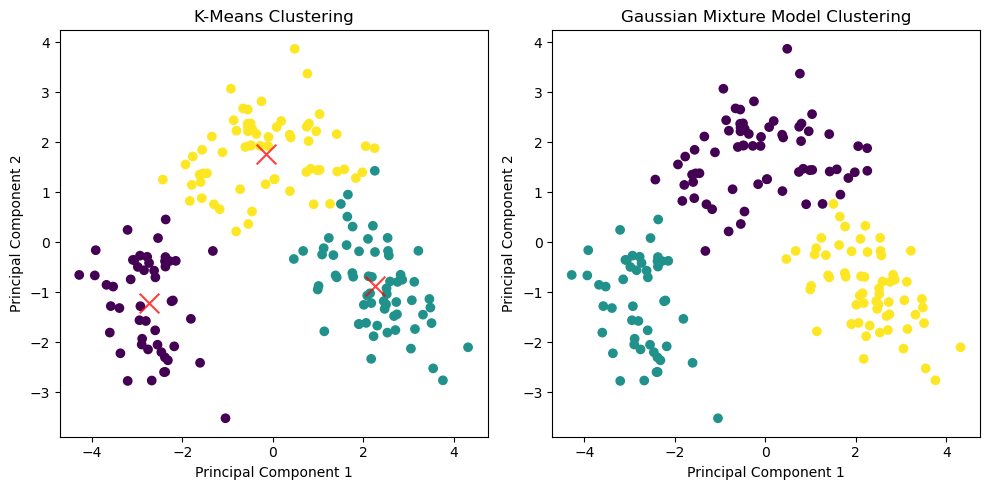

In [6]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
# Initialize K-Means and Gaussian Mixture Model
kmeans = KMeans(n_clusters=3, random_state=42)
gmm = GaussianMixture(n_components=3, random_state=42)

# Fit the models
kmeans_labels = kmeans.fit_predict(X_pca)
gmm_labels = gmm.fit_predict(X_pca)

# We can visualize the results of these clusterings to compare them
plt.figure(figsize=(10, 5))

# K-Means clustering visualization
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', marker='o')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x')
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# Gaussian Mixture Model clustering visualization
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='viridis', marker='o')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()



**In the visualizations:**

* The left plot shows the clusters as found by the K-Means algorithm, with the red 'x' marks representing the centroids of the clusters.
* The right plot illustrates the clusters according to the GMM. GMM does not explicitly provide cluster centers because it uses probability distributions to assign points to clusters.


###**Conclusion:**
* K-Means is useful for clearly separating data into groups, while GMM is better suited to identifying overlapping, probabilistic-based groupings. The choice between which model to use should be based on the data distribution and specific clustering task requirements.
* Using the scikit-learn library in Python, both K-Means and GMM can be implemented and compared. Analyzing the results from both models provides insights into the structure of the Wine dataset and helps determine which model better captures the natural groupings within the data.
- Both algorithms identified clusters that did not exactly match the true wine varieties, but provided insights into how wines might group based on their chemical composition.

#####**Limitations:**

- The linear method of PCA was used may not capture all the dataset's nuances.
- Only a set of number of clusters was chosen to match the known wine classes, which may not reflect the natural groupings in the data.
- The interpretability of the clusters is limited due to the lack of domain expertise .

#####**Future Improvements:**

- Experimenting with non-linear dimensionality reduction techniques for potentially better clustering results.
- Collaborate with domain experts for deeper insights into the clustering results.
- Explore more advanced models and validate findings with additional external data.

Although the clustering provided some useful initial findings, it's worth noting that there is still room for a more nuanced approach that could lead to richer interpretations and more accurately defined clusters.




